##Bayesian Inference
Bayesian Inference presents thw following attributes:
1. Useful for stream processing due to its fast training (Real-Time)
2. Low amount of data required.
3. Appropriate for non-linear problems.
4. Appropriate for multiple claassification
5. Balaced data is required for Bayesian Inference works optimally.


#1. Import libraries

In [1]:
import pandas as pd

#path handle -> combina csv files
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
#Get files names
files = glob.glob('*csv') 
files

['Youtube05.csv',
 'Youtube01.csv',
 'Youtube02.csv',
 'Youtube04.csv',
 'Youtube03.csv']

In [3]:
#combine csv files 
all_df = []

for file in files:
  all_df.append(pd.read_csv(file).drop(['COMMENT_ID', 'AUTHOR','DATE'],axis=1))

all_df[0]

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0
...,...,...
365,I love this song because we sing it at Camp al...,0
366,I love this song for two reasons: 1.it is abou...,0
367,wow,0
368,Shakira u are so wiredo,0


- 0 -> Ham
- 1 -> Spam

In [4]:
#array elements to df
data = pd.concat(all_df, axis=0, ignore_index=True )
data

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0
...,...,...
1950,Like this comment for no reason﻿,1
1951,love this song﻿,0
1952,this song is awesome. these guys are the best....,1
1953,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


In [5]:
#check for missing values
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [6]:
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

##Message Sample

In [7]:
message = ['Argentina will win the world cup']

vectorizer_sample = CountVectorizer()
vectorizer_sample.fit(message)
vectorizer_sample.transform(message).toarray() #sparse matrix

array([[1, 1, 1, 1, 1, 1]])

In [8]:
vectorizer_sample.get_feature_names_out()

array(['argentina', 'cup', 'the', 'will', 'win', 'world'], dtype=object)

In [9]:
vectorizer_sample.fit_transform(['Hello there', 'Let it be']).toarray()

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0]])

In [10]:
vectorizer_sample.get_feature_names_out()

array(['be', 'hello', 'it', 'let', 'there'], dtype=object)

In [11]:
vectorizer_sample.transform(['Those are birds']).toarray()


array([[0, 0, 0, 0, 0]])

No one words of 'Those are birds' are in `vectorizer`

In [12]:
inputs = data['CONTENT']
target = data['CLASS']

x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                      test_size=0.2, 
                                                      random_state = 365, #same split in each run
                                                      stratify = target) #equal portions of target class in train and test size 

In [13]:
#check stratified split for y_train and y_test
y_train.value_counts(normalize=True)
#y_test.value_counts(normalize=True)

1    0.513427
0    0.486573
Name: CLASS, dtype: float64

##Tokenize Data

In [14]:
vectorizer = CountVectorizer()

x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [15]:
# Display sparse matrix (opposite to dense matrix)
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [16]:
x_train_transf.shape

(1564, 3856)

- 1564 instances (rows in data)
- 3856 words

In [17]:
x_test_transf.shape

(391, 3856)

- 391 instances (rows in data)
- 3856 words

**IMPORTANT:** Always splits data *before* transforming data to prevent Data Leakage. Thus, the train data is not incluenced by mean and standard desviation of test data. Testing need to present truly new data.

##Naive Bayes Algorithms
1. **Gaussian:** It assumes that the likelihood funciton of features has Gauss distribution (useful for continuos features).
2. **Bernoulli:** It assumes that all features are binary valued.
3. **Categorical:** Each feature has its own categorical distribution.
4. **Multinominal:** Useful for text classification and balanced data.
5. **Complement:** Useful for text classification and unbalanced data.

In [18]:
# clf:Classifier
clf = MultinomialNB(class_prior = np.array([0.55,0.45]), fit_prior= True) #55% ham probability expected
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.55, 0.45]))

In [19]:
clf.get_params()

{'alpha': 1.0, 'class_prior': array([0.55, 0.45]), 'fit_prior': True}

- **alpha (smoothing parameter):** Default 1. It prevents zero probability for a new word is test. Alpha if adjusted during training.
- **class_prior:** Set specific values for prior probabilities.
- **fit_prior = True** The model learns from previous probabilities. *fit_prior = False -> Uniform prior*

##Metrics performing
###Confusion Matrix

In [20]:
y_test_pred = clf.predict(x_test_transf)

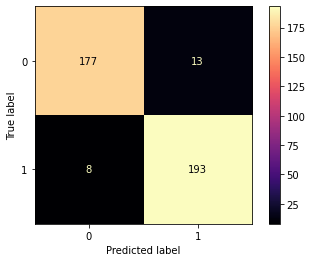

In [21]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels= clf.classes_,
    cmap='magma'
)

- Negative: 0 (Ham)
- Positive: 1 (Spam)
----
- True Negative = TN = 163
- False Positive = FP = 27
- False Negative = FN = 8
- True Positive = TP = 193


In [22]:
print(classification_report(y_test, y_test_pred, target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.96      0.93      0.94       190
        Spam       0.94      0.96      0.95       201

    accuracy                           0.95       391
   macro avg       0.95      0.95      0.95       391
weighted avg       0.95      0.95      0.95       391



- Accuracy = (TP + TN)/All samples
- Precision (accuracy of each class) = TP/(TP + FP)
- Recall (Spam comments that the model has caught) = TP/(TP + FN)
- F1 (armonic mean of precision and recall) = 2* (Precision* Recall)/(Precision + Recall)





###Ditribution plot

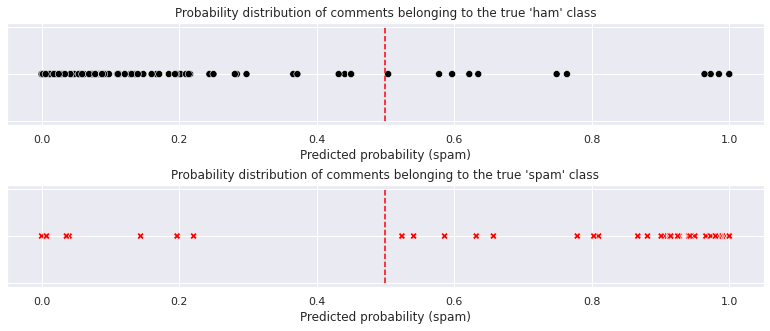

In [23]:
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

df_scatter = pd.DataFrame()

df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

df_scatter = df_scatter.reset_index(drop = True)

palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

df_scatter_0 = df_scatter[df_scatter['True class'] == 0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class'] == 1].reset_index(drop = True)

sns.set()

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_0.shape[0]), 
                data = df_scatter_0,
                hue = 'True class', 
                s = 50,
                markers = ['o'],
                palette = palette_0,
                style = 'True class',
                legend = False, 
                ax = ax1).set(yticklabels=[])

ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')
ax1.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');


sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['X'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');

In general, Naive Bayes classifiers are very good predictors and regular estimators.

##Making Predictions

In [24]:
predict_data = vectorizer.transform(['I really love this film', 'Click here to earn 1 millon dolar'])
clf.predict(predict_data)

#ham:0, spam:1

array([0, 1])